# Task: Gain intuition on student performance through descriptive statistics on economic, personal and social attributes

# Tools: Python Libraries (Numpy, Pandas, Seaborn and Matplotlib)

# Dataset: Student Performance dataset 

## 1. Install needed libraries

In [ ]:
!pip install numpy pandas matplotlib seaborn scipy

## 2. Import needed libraries

In [1]:
import numpy as np
# numerical data processing
import pandas as pd
# data preprocessing and analysis
import matplotlib.pyplot as plt
# data visualization
import seaborn as sns
# data visualization

%matplotlib inline
# magic function to show visualizations in notebook

##  3. Reading the datatest

In [2]:
data = pd.read_csv("StudentsPerformance.csv")
data.head(4)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44


## 4. Exploring the dataset

### size of data

In [3]:
data.shape

(1000, 8)

#### shows the data has 1000 rows and 8 columns

### data info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### checking for null values

In [5]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### shows there are no null values in any of the columns

### Descibe the data

In [6]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### A first look shows most of the students did well in the subjects with above average (50) scores.
#### We will explore the data in details

### checking for unique categories in each categorical columns

In [7]:
columns = data.columns[:-3]
columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [9]:
count = 0
for i in columns:
    print('unique categories in', i ,':')
    for j in data[i].unique():
        count +=1
        print(count, '.', j)


unique categories in gender :
1 . female
2 . male
unique categories in race/ethnicity :
3 . group B
4 . group C
5 . group A
6 . group D
7 . group E
unique categories in parental level of education :
8 . bachelor's degree
9 . some college
10 . master's degree
11 . associate's degree
12 . high school
13 . some high school
unique categories in lunch :
14 . standard
15 . free/reduced
unique categories in test preparation course :
16 . none
17 . completed


### 4a. Exploring the numerical features (subjects) to   check for correlation in students' performance

<function matplotlib.pyplot.show(*args, **kw)>

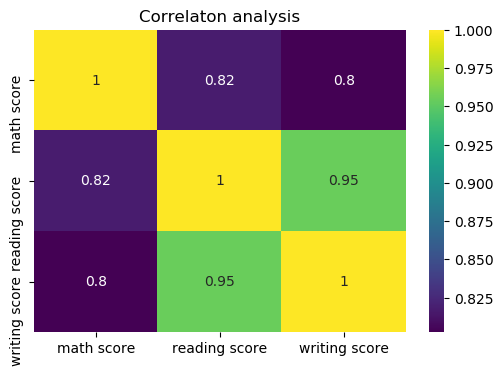

In [10]:
corr = data.corr()
plt.figure(dpi = 100)
plt.title('Correlaton analysis')
sns.heatmap(corr, annot = True, cmap = 'viridis')
plt.show

#### 1. This shows a high correlation in  performance for each subject.
#### 2. Students who perform well in a subject have higher probablity to perform well in others.
#### 3. There is also a distincive higher correlation for reading and writing, which is expcted.
#### 4. The correlation also shows that performance in each subject is  possibly affected by the same factors

### 4a(i) Exploring the subjects to check performance of students in each subject

In [11]:
# assuming that poor score = 0-39,avrage score = 40 - 69 and good score = 69-100
poor = 40 # poor score
good = 70 # good score

### 1.Maths

Text(0.5, 1.0, 'Maths score distribution')

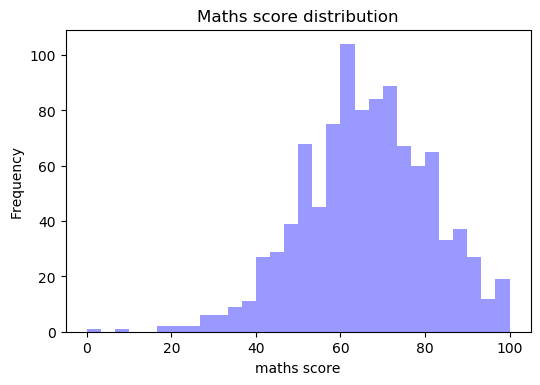

In [12]:
# plot score distribtion graph
plt.figure(dpi = 100)
sns.distplot(data['math score'], color = 'b',  kde = False, bins = 30)
plt.ylabel('Frequency')
plt.xlabel('maths score')
plt.title('Maths score distribution')

In [13]:
math  = data['math score']
per_of_poor = len(data[math <poor]) / 10
per_of_average = len(data[(math > poor) & (math  < good)]) / 10
per_of_good = len(data[(math > good)]) / 10
print("Percentage of students with poor score: {:.2f}".format(per_of_poor) + "%") 
print("Percentage of students with average score: {:.2f}".format(per_of_average) + "%") 
print("Percentage of students with good score:{:.2f}".format(per_of_good) + "%") 

Percentage of students with poor score: 4.00%
Percentage of students with average score: 54.10%
Percentage of students with good score:39.10%


#### 1. From the distribution plot, most of the student  scored between 60 - 70 marks in maths
#### 2. only few student had poor scores (4%), with most (95%)  having above average scores

### 2.Reading

Text(0.5, 1.0, 'reading score distribution')

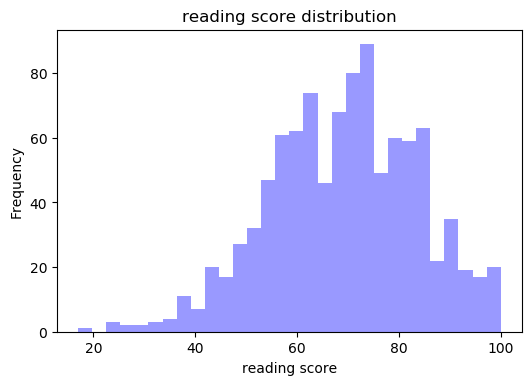

In [14]:
# plot score distribtion graph
plt.figure(dpi = 100)
sns.distplot(data['reading score'], color = 'b',  kde = False, bins = 30)
plt.ylabel('Frequency')
plt.xlabel('reading score')
plt.title('reading score distribution')

In [15]:
reading  = data['reading score']
per_of_poor = len(data[reading <poor]) / 10
per_of_average = len(data[(reading > poor) & (reading  < good)]) / 10
per_of_good = len(data[(reading > good)]) / 10
print("Percentage of students with poor score: {:.2f}".format(per_of_poor) + "%") 
print("Percentage of students with average score: {:.2f}".format(per_of_average) + "%") 
print("Percentage of students with good score: {:.2f}".format(per_of_good) + "%") 

Percentage of students with poor score: 2.60%
Percentage of students with average score: 46.00%
Percentage of students with good score: 48.70%


#### 1. From the plot, most of the students  scored between 65 - 75 marks in reading.
#### 2.  Only few students had poor score (2.60%)while most of the students (97%) passed the score.
#### 3. The students performed better in reading than in maths as almost half  of the students (48%) had scores above 70( out of 100).

### 3.Writing

Text(0.5, 1.0, 'writing score distribution')

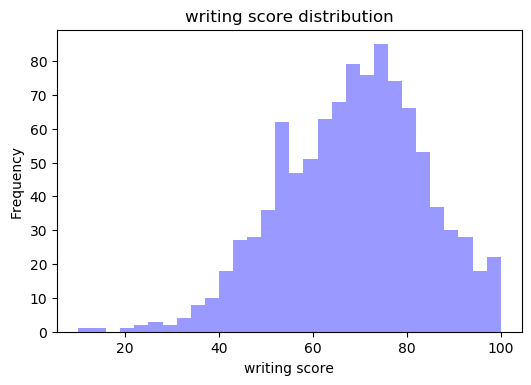

In [16]:
# plot score distribtion graph
plt.figure(dpi = 100)
sns.distplot(data['writing score'], color = 'b',  kde = False, bins = 30)
plt.ylabel('Frequency')
plt.xlabel('writing score')
plt.title('writing score distribution')

In [17]:
writing  = data['writing score']
per_of_poor = len(data[writing <poor]) / 10
per_of_average = len(data[(writing > poor) & (writing  < good)]) / 10
per_of_good = len(data[(writing > good)]) / 10
print("Percentage of students with poor score: {:.2f}".format(per_of_poor) + "%") 
print("Percentage of students with average score: {:.2f}".format(per_of_average) + "%") 
print("Percentage of students with good score: {:.2f}".format(per_of_good) + "%")

Percentage of students with poor score: 3.20%
Percentage of students with average score: 47.60%
Percentage of students with good score: 45.60%


#### 1.  From the plot, most of the student scored between 65 - 75 marks in maths
#### 2. The writing scores is similar to the reading score.

## There is a high correlation between the student's performance in all subjects, this means that the performance of the students is barely affected by the difficulty or uniqueness of the subject but rather by other factors

### 4b. Exploring the categorical features

#### we can use an average score to explore the categorical features since the numerical features (subjects) are correlated

In [18]:
# create a new average score column
data['average score'] = round((data['math score'] + data['reading score'] + data['writing score']) / 3)
data.head(4)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0


#### calculate the mean score for each categorical feature to show average performance and influence of each category on students' performance

In [19]:
# group the data into each categorical feature and print the mean score
for i in columns:
    print('groupby', i ,':')
    group = data.groupby(i)['average score'].aggregate('mean')
    print(group)

groupby gender :
gender
female    69.569498
male      65.819502
Name: average score, dtype: float64
groupby race/ethnicity :
race/ethnicity
group A    62.955056
group B    65.484211
group C    67.122257
group D    69.179389
group E    72.714286
Name: average score, dtype: float64
groupby parental level of education :
parental level of education
associate's degree    69.558559
bachelor's degree     71.949153
high school           63.122449
master's degree       73.576271
some college          68.446903
some high school      65.072626
Name: average score, dtype: float64
groupby lunch :
lunch
free/reduced    62.191549
standard        70.827907
Name: average score, dtype: float64
groupby test preparation course :
test preparation course
completed    72.670391
none         65.024922
Name: average score, dtype: float64


## The above grouping shows that:
### 1. Female Student  performed slightly better than males
### 2. Student from group Group E ethnicity performed better than others, while group A ethnicity performed least.
### 3. Students whoose parents have higher level of education performed better than those with lower education.
### 4. Students who had standard lunch and completed their preparation course got the higher scores.
### 5. The test preparatory  course seems to have the greatest effect on performance of all the available categorical features.

### 4b(i) Visualizing the grouping

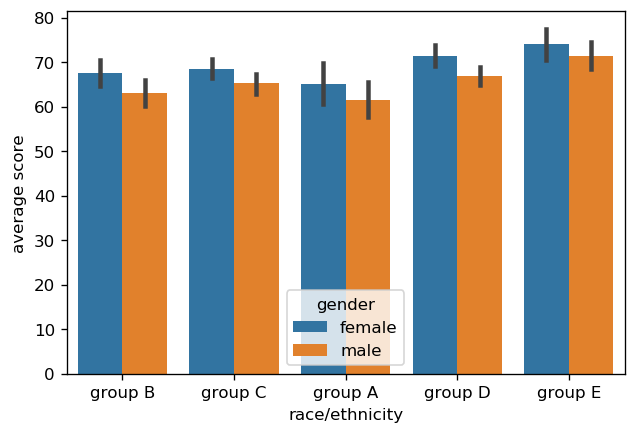

In [20]:
plt.figure(dpi =  120)
sns.barplot(x = 'race/ethnicity',hue = 'gender', y = 'average score', data = data)

#### 1.  The bar plot shows group E race have a better score average than other races, followed by groups D, C and B with group A with the least performance average.

#### 2. It also shows the the girls performed better than the boys in all the races

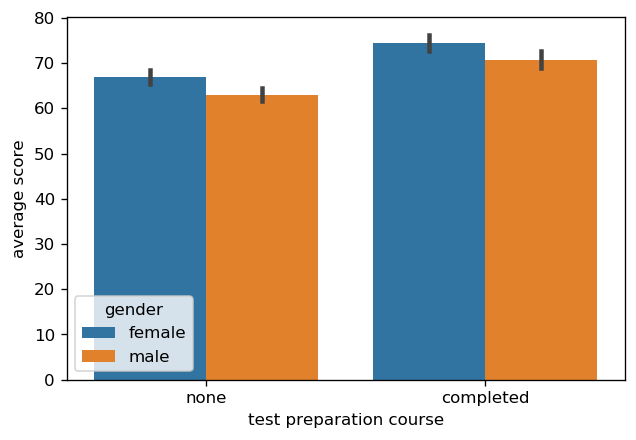

In [21]:
plt.figure(dpi =  120)
sns.barplot(x = 'test preparation course',hue = 'gender', y = 'average score', data = data)

#### 1.  The bar plot shows students who completed the performance test peformed better than those who didn't

#### 2. It also shows the the girls performed better than the boys.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

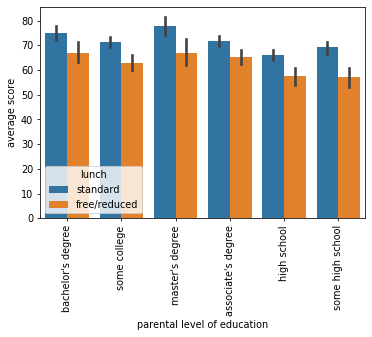

In [22]:
plt.figure(dpi =  70)
sns.barplot(x = 'parental level of education',hue = 'lunch', y = 'average score', data = data)
plt.xticks(rotation = 90)

####  Shows thst students whoose parents have higher level of education performed better than those with lower education.

#### and that those with standard lunch performed better than those with free/reduced lunch.

### 4c. Finally we explore each categorical feature to determine the extent of its influence in students' performance

### Grade the average scores to bettrer explore the performance

In [23]:
# grade the scores into four categories of poor(F), average(C), good(B) and excellent(A)
# F(0-39), average(40 - 55), good( 56- 74), excellent(75-100)
def func(x):
    if x < 40:
        return 'F'
    elif 40 <= x < 56:
        return 'C'
    elif 56 <= x < 75:
        return 'B'
    elif x > 75:
        return 'A'

In [24]:
# apply the function to create a new data column of grades
data['grade'] = data['average score'].apply(func)
data.head(4)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0,B
1,female,group C,some college,standard,completed,69,90,88,82.0,A
2,female,group B,master's degree,standard,none,90,95,93,93.0,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0,C


In [26]:
# create a frequency table showing percentage of each grade for each category
x = 'grade'
for i in columns[1:]:
    cross_tab = pd.crosstab(data[i], data[x]).apply(lambda r: round((r/r.sum()) * 100), axis = 1)
    print('cross tab for: ', i,) 
    print(cross_tab)
    print()
    

cross tab for:  race/ethnicity
grade              A     B     C    F
race/ethnicity                       
group A         21.0  44.0  31.0  3.0
group B         28.0  47.0  20.0  4.0
group C         29.0  52.0  17.0  3.0
group D         33.0  50.0  15.0  2.0
group E         46.0  41.0  11.0  1.0

cross tab for:  parental level of education
grade                           A     B     C    F
parental level of education                       
associate's degree           37.0  45.0  18.0  0.0
bachelor's degree            38.0  50.0  12.0  1.0
high school                  18.0  51.0  26.0  5.0
master's degree              48.0  40.0  12.0  0.0
some college                 32.0  52.0  13.0  3.0
some high school             28.0  46.0  20.0  5.0

cross tab for:  lunch
grade            A     B     C    F
lunch                              
free/reduced  20.0  48.0  26.0  6.0
standard      38.0  49.0  13.0  1.0

cross tab for:  test preparation course
grade                       A     B     C 

###  Conclusion

### 1. Group  E ethnicity has the best performance, with almost half (46%) of the group having excellent scores compared to group  A which has most average and below average scores.

### 2. Parental level of education also played a major role in performance. students of parents with lower education had the highest rate of failure (5%) and lower excellent scores.

### 3. Students who had standard lunch performed much better than those who didn't, with 1% failure compared to 6% for those with free/reduced lunch and twice as much (38% to 20% excellent scores). This appears to have the greatest influence.

### 4. There is also a much difference in performance between those who completed the test preparation course and those who didn't.



### Rocommendation.

## 1.) It is surprsing to see ethnicity play an important role in performance, possibilty of racism is not impossibe in this setting.

## 2) Proper lunch also helped the student perform better, who would have thouht so?

## 3) Students stand a better chance of excellent grades by completing the preparatory test.

## 4) Further analysis can be carried out the find correlation or relationships beteween the categorical features, like if  students from a particular have the higher possiblity of having parents  with lower education and how that affects their lunch, this could explain why students from the Group A performed least as they could be immigrants with lesser skills or finance.